In [4]:
import tensorflow as tf;
import numpy as np;

In [20]:
X = tf.placeholder(shape = [None, 1], dtype = tf.float32)

In [21]:
Y = tf.placeholder(shape = [None, 1], dtype = tf.float32)

In [24]:
W = tf.Variable(tf.random_normal(shape = [1,1]), name = 'weight')
B = tf.Variable(tf.random_normal(shape = [1,1]), name = 'bias')

In [25]:
h = W*X+B

In [53]:
cost = tf.reduce_sum((Y-h)**2)/(2*tf.cast(tf.size(Y), tf.float32))
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [54]:
n_samples = 30
train_x = np.linspace(0, 20, n_samples)
train_y = -2 * train_x + 4 * np.random.randn(n_samples)

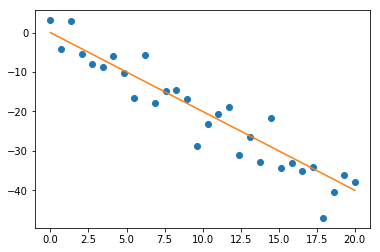

In [55]:
import matplotlib.pyplot as plt
plt.plot(train_x, train_y, 'o')
plt.plot(train_x, -2 * train_x)
plt.show()

In [56]:
init = tf.global_variables_initializer()

In [59]:
with tf.Session() as sess:
    sess.run(init);
    for epochs in range(1,300):
        sess.run(optimizer, feed_dict={X: train_x.reshape(30,1), Y: train_y.reshape(30,1)})
        c = sess.run(cost, feed_dict={X: train_x.reshape(30,1), Y: train_y.reshape(30,1)})
        w = sess.run(W)
        b = sess.run(B)
        print('epoch: =' + str(epochs) +' c= '+str(c) + ' w= ' + str(w) + ' b= ' +str(b))

epoch: =1 c= 19.491526 w= [[-2.5355997]] b= [[0.66942155]]
epoch: =2 c= 10.311845 w= [[-1.9998343]] b= [[0.7080281]]
epoch: =3 c= 9.097439 w= [[-2.1945996]] b= [[0.692672]]
epoch: =4 c= 8.936712 w= [[-2.123665]] b= [[0.696946]]
epoch: =5 c= 8.915371 w= [[-2.1493678]] b= [[0.69408387]]
epoch: =6 c= 8.912467 w= [[-2.1399233]] b= [[0.6938206]]
epoch: =7 c= 8.9120035 w= [[-2.1432621]] b= [[0.6926155]]
epoch: =8 c= 8.911865 w= [[-2.141952]] b= [[0.69175637]]
epoch: =9 c= 8.911768 w= [[-2.142333]] b= [[0.6907748]]
epoch: =10 c= 8.911677 w= [[-2.142099]] b= [[0.68984115]]
epoch: =11 c= 8.911588 w= [[-2.142089]] b= [[0.68889344]]
epoch: =12 c= 8.911499 w= [[-2.1419978]] b= [[0.6879542]]
epoch: =13 c= 8.911411 w= [[-2.1419363]] b= [[0.68701524]]
epoch: =14 c= 8.911322 w= [[-2.1418643]] b= [[0.6860795]]
epoch: =15 c= 8.911235 w= [[-2.1417966]] b= [[0.6851459]]
epoch: =16 c= 8.911147 w= [[-2.1417272]] b= [[0.6842149]]
epoch: =17 c= 8.911061 w= [[-2.1416588]] b= [[0.68328625]]
epoch: =18 c= 8.9109

epoch: =148 c= 8.902872 w= [[-2.1340604]] b= [[0.5804259]]
epoch: =149 c= 8.902829 w= [[-2.1340117]] b= [[0.5797685]]
epoch: =150 c= 8.902785 w= [[-2.1339633]] b= [[0.57911277]]
epoch: =151 c= 8.902742 w= [[-2.133915]] b= [[0.5784587]]
epoch: =152 c= 8.902699 w= [[-2.1338668]] b= [[0.5778064]]
epoch: =153 c= 8.902658 w= [[-2.1338186]] b= [[0.5771558]]
epoch: =154 c= 8.902616 w= [[-2.133771]] b= [[0.5765069]]
epoch: =155 c= 8.902573 w= [[-2.133723]] b= [[0.5758597]]
epoch: =156 c= 8.902532 w= [[-2.1336753]] b= [[0.5752142]]
epoch: =157 c= 8.90249 w= [[-2.133628]] b= [[0.57457036]]
epoch: =158 c= 8.902449 w= [[-2.1335802]] b= [[0.57392824]]
epoch: =159 c= 8.902407 w= [[-2.1335332]] b= [[0.5732877]]
epoch: =160 c= 8.902366 w= [[-2.1334858]] b= [[0.57264894]]
epoch: =161 c= 8.902326 w= [[-2.1334388]] b= [[0.5720118]]
epoch: =162 c= 8.902285 w= [[-2.1333919]] b= [[0.5713764]]
epoch: =163 c= 8.902244 w= [[-2.1333451]] b= [[0.5707426]]
epoch: =164 c= 8.9022045 w= [[-2.1332984]] b= [[0.5701104

In [300]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [301]:
for i in range(0,30):
    data['data'][:,i] = data['data'][:,i]-np.mean(data['data'][:,i]);
    data['data'][:,i] = data['data'][:,i]/np.std(data['data'][:,i]);
data['data']

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [302]:
data['target'].shape

(569,)

In [303]:
# Define placeholders
X = tf.placeholder(dtype=tf.float32, shape=[None, 30])
Y = tf.placeholder(dtype=tf.float32, shape=[None, 1])

In [304]:
W = tf.Variable(tf.random_normal(shape=[30, 1]))
b = tf.Variable(tf.random_normal(shape=[1, 1]))
init = tf.global_variables_initializer()

In [320]:
h = tf.nn.sigmoid(tf.add(tf.linalg.matmul(X,W), b))
#h = tf.nn.softmax(tf.matmul(W, tf.transpose(X)) + b)
correct = tf.cast(tf.equal(tf.round(h), Y), dtype=tf.float32)
accuracy = tf.reduce_mean(correct)

In [330]:
cost = tf.reduce_sum(-(Y*tf.math.log(h+ 1e-10) + (1-Y)*tf.math.log(1-h+ 1e-10))/(tf.cast(tf.size(Y), tf.float32)))
#cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=h, labels=Y)); 
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [331]:
init = tf.global_variables_initializer()

In [334]:
batch_size = 100;
with tf.Session() as sess:
    sess.run(init);
    for epochs in range(1,1000):
        batch_index = np.random.choice(len(data['target']), size=batch_size)
        batch_train_X = data['data'][batch_index]
        batch_train_y = np.matrix(data['target'][batch_index]).T
        sess.run(optimizer, feed_dict={X: batch_train_X, Y: batch_train_y})
        temp_loss = sess.run(cost, feed_dict={X: batch_train_X, Y: batch_train_y})
        acc = sess.run(accuracy, feed_dict={X: batch_train_X, Y: batch_train_y})
        print(str(temp_loss)+ ' , '+str(acc))

1.3864043 , 0.62
1.1923422 , 0.65
0.80304444 , 0.68
1.0986071 , 0.7
0.7610862 , 0.73
0.7397619 , 0.75
0.8777295 , 0.73
0.8038233 , 0.79
0.78071743 , 0.74
1.0227517 , 0.74
1.0749677 , 0.7
0.7855999 , 0.83
0.9549047 , 0.71
0.7892071 , 0.75
0.9292245 , 0.74
0.8789761 , 0.75
0.68582773 , 0.77
0.68990254 , 0.75
0.62469906 , 0.79
0.9676803 , 0.7
0.90044063 , 0.75
0.5856016 , 0.8
1.1247756 , 0.68
0.8327769 , 0.79
1.0757009 , 0.72
0.82332474 , 0.81
0.78562677 , 0.72
0.67835724 , 0.77
0.62961227 , 0.79
0.88725024 , 0.76
0.87123555 , 0.75
0.93095016 , 0.77
0.97803795 , 0.74
0.6441855 , 0.76
0.5920152 , 0.79
0.61889833 , 0.81
0.892578 , 0.73
0.57436925 , 0.81
0.42326796 , 0.81
0.54422015 , 0.81
0.6801063 , 0.81
0.834372 , 0.69
0.5296475 , 0.82
0.66043234 , 0.74
0.5115844 , 0.85
0.4653814 , 0.81
0.63913465 , 0.8
0.53635514 , 0.81
0.6383417 , 0.8
0.57413995 , 0.8
0.5634491 , 0.78
0.45766333 , 0.82
0.6440022 , 0.75
0.74165857 , 0.75
0.54976845 , 0.82
0.6510546 , 0.72
0.5601036 , 0.77
0.8583721 , 0.7

0.053383302 , 0.98
0.14743637 , 0.94
0.15871201 , 0.94
0.19376443 , 0.93
0.10869198 , 0.95
0.21940266 , 0.9
0.06403618 , 0.98
0.18351509 , 0.92
0.18168044 , 0.93
0.18990393 , 0.93
0.46877638 , 0.87
0.22076032 , 0.93
0.15595159 , 0.96
0.10250536 , 0.97
0.19312416 , 0.93
0.16521835 , 0.96
0.12729408 , 0.94
0.35109106 , 0.9
0.23282988 , 0.94
0.13182564 , 0.96
0.18441963 , 0.95
0.20193264 , 0.93
0.10387748 , 0.96
0.14598563 , 0.94
0.1775562 , 0.96
0.20317858 , 0.95
0.13858137 , 0.98
0.32087693 , 0.91
0.18390906 , 0.94
0.1103929 , 0.97
0.16933958 , 0.94
0.20106491 , 0.96
0.10016094 , 0.96
0.12306586 , 0.94
0.18996076 , 0.95
0.09607558 , 0.97
0.25876367 , 0.92
0.12157808 , 0.94
0.18369323 , 0.93
0.18182796 , 0.94
0.23398352 , 0.91
0.23871168 , 0.92
0.27516544 , 0.95
0.14827165 , 0.94
0.090723 , 0.97
0.13030788 , 0.96
0.20396648 , 0.92
0.34991908 , 0.88
0.16653705 , 0.94
0.22966802 , 0.93
0.16630249 , 0.93
0.21042614 , 0.93
0.16880684 , 0.94
0.14655101 , 0.93
0.097133465 , 0.99
0.12221243 , 0

0.1267311 , 0.97
0.08387192 , 0.98
0.16836475 , 0.92
0.2338016 , 0.94
0.0966898 , 0.94
0.17004895 , 0.92
0.12471534 , 0.97
0.17996149 , 0.96
0.16158012 , 0.95
0.07483527 , 0.95
0.17604423 , 0.95
0.11338169 , 0.95
0.13774328 , 0.95
0.17269702 , 0.95
0.062001295 , 0.96
0.2555656 , 0.94
0.15974882 , 0.94
0.24569352 , 0.93
0.13121314 , 0.91
0.144629 , 0.94
0.119378805 , 0.95
0.045596033 , 0.99
0.17360933 , 0.94
0.20297685 , 0.92
0.16169594 , 0.96
0.17278296 , 0.93
0.12213444 , 0.94
0.16160506 , 0.94
0.12748006 , 0.93
0.093404934 , 0.96
0.09177996 , 0.96
0.19214702 , 0.92
0.15145785 , 0.92
0.20379375 , 0.94
0.10435487 , 0.97
0.09620321 , 0.95
